> To live! like a tree alone and free,
> and like a forest in solidarity...
> Nazim Hikmet

<center> <h1> Random Forests (Yes! No Forest Image) </h1> </center>



__Objectives__

- Introduction of 'bagging' procedure.

- Identifying the need for bootstrapping for random forests

- Comparing Random forests and bagging methods

- Evaluating a model by random forest model

# Review: Bootstrapping


<img src= "img/bootstrap1.png" style="height:250px">


# Bagging


Let's us one more time recall that if $Z_{1}, \cdots, Z_{n}$ are independent observations with variance $\sigma^{2}$ then the variance of the mean $\bar{Z}$ is given by $\frac{\sigma^{2}}{n}$. 

__How is this relevant now?__



We will use this idea calculate $$ \hat{f}^{1}(x), \cdots, \hat{f}^{B}(x)$$ where each $\hat{f}^{i}$ represents a decision tree fitted to the bootstrapped data.

Then we will make a prediction by: 

$$ \hat{f}_{\text{avg}}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{b}(x)$$

Note that this is for regression and for the classification we can get majority vote.

[sklearn averages over probabilities not majority vote](https://scikit-learn.org/stable/modules/ensemble.html#forest)


## Random Forests

__Problem__ We still have some problem with this approach and random forests will address this problem. Can you see the issue?

- If we have a strong predictor then this will dominate in each tree.

Hint: Correlated trees

## Sklearn for RandomForests

In [1]:
import pandas as pd

In [7]:
## you can download the data from -- https://www.kaggle.com/ishaanv/ISLR-Auto#Heart.csv

## or http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
heart = pd.read_csv('data/Heart.csv', index_col = 0)
heart.head()
print(heart.shape)

(303, 14)


In [9]:
heart.AHD.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

In [10]:
heart.dropna(axis= 0, how= 'any', inplace = True)
y = heart.AHD
heart.drop(columns= 'AHD', inplace = True)

In [11]:
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal


In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 13 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
dtypes: float64(2), int64(9), object(2)
memory usage: 32.5+ KB


In [13]:
display(heart.Thal.value_counts())
display(heart.ChestPain.value_counts())

normal        164
reversable    115
fixed          18
Name: Thal, dtype: int64

asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: ChestPain, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train, y_test = train_test_split(heart, y, test_size= 0.20, stratify = y)

In [16]:
X_train.ChestPain.value_counts()

asymptomatic    111
nonanginal       66
nontypical       38
typical          22
Name: ChestPain, dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
categorical_variables = X_train.select_dtypes(include=['object']).columns
numerical_variables = X_train.select_dtypes(include = ['int64', 'float64']).columns

In [18]:
import numpy as np

In [19]:
ohe = OneHotEncoder(drop = 'first')
X_categ = ohe.fit_transform(X_train[categorical_variables]).toarray()
X_num = X_train[numerical_variables].values
Xtrain = np.concatenate((X_categ, X_num), axis = -1,)
Xtrain.shape

(237, 16)

In [20]:
## now we should transform the test data 
## to be able to use it for the prediction

X_test_categ = ohe.transform(X_test[categorical_variables]).toarray()
X_test_num = X_test[numerical_variables].values
Xtest = np.concatenate((X_test_categ, X_test_num), axis = -1,)
Xtest.shape

(60, 16)

In [21]:
Xtrain

array([[0. , 0. , 0. , ..., 2.6, 2. , 0. ],
       [0. , 0. , 0. , ..., 2.1, 2. , 1. ],
       [0. , 0. , 1. , ..., 0.8, 1. , 2. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 1. , 2. ],
       [0. , 0. , 0. , ..., 0. , 1. , 1. ],
       [0. , 0. , 0. , ..., 0. , 1. , 1. ]])

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
## max_depth feature reduces overfitting clf score needs to be close to clf out of box score

In [35]:
clf = RandomForestClassifier(n_estimators= 100, 
                             criterion= 'gini',
                             max_depth = 4,
                             max_features= 'auto',
                             oob_score= True)

In [39]:
clf.fit(Xtrain,y_train)
a_tree = clf.estimators_[5]

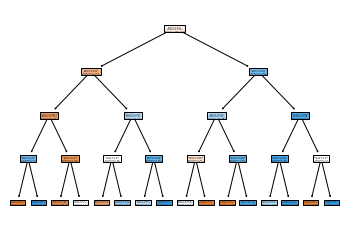

In [43]:
tree.plot_tree(a_tree.fit(Xtrain, y_train), 
               filled = True,);

In [26]:
print(clf.feature_importances_)

[0.04085139 0.00867049 0.01860218 0.12609478 0.07015629 0.10025924
 0.02058893 0.0678343  0.0775999  0.01113698 0.01769246 0.11230431
 0.07955432 0.09586224 0.05165701 0.10113517]


In [27]:
print(clf.predict(Xtrain))

['Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No'
 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 

In [37]:
clf.score(Xtrain,y_train)

0.9282700421940928

In [38]:
clf.oob_score_

0.7974683544303798

In [32]:
from sklearn import tree

__Your Turn__

- Use 5 fold cross_validation to fit random forest classifier we created above.
- Don't forget to return training scores and trained estimators.

In [44]:
from sklearn.model_selection import cross_validate

In [45]:
# %load -r 1-6 supplement.py
cv = cross_validate(estimator = clf,
                    X = Xtrain,
                    y = y_train,
                    return_train_score=True,
                    return_estimator=True,
                    cv=5)

__Your Turn__

- What is the type of validator above?

- Check test vs train(validation) scores.

- Print "mean +/- std" for both train and test scores

- Also print oob_scores and compare them with cross_validation scores

In [46]:
# %load -r 9-17 supplement.py
mean_test = np.mean(cv['test_score'])
std_test = np.std(cv['test_score'])

mean_train = np.mean(cv['train_score'])
std_train = np.std(cv['train_score'])


print("Train score: %.3f +/- %.3f"%(mean_train, std_train))
print("Test score: %.3f +/- %.3f"%(mean_test, std_test))

Train score: 0.937 +/- 0.012
Test score: 0.827 +/- 0.017


In [47]:
clf.fit(Xtrain, y_train)
clf.oob_score_

0.8143459915611815

__Your Turn__

- Note that we have over-fitting problem. 

- Let's try to reduce over-fitting

In [44]:
y_train.value_counts()

No     128
Yes    109
Name: AHD, dtype: int64

In [48]:
# %load -r 20-27 supplement.py
clf = RandomForestClassifier(n_estimators= 300,
                             criterion= 'gini',
                             max_features= 'auto', max_depth= 7,
                             oob_score= True)

clf.fit(Xtrain, y_train);
clf.score(Xtrain, y_train)
clf.oob_score_

0.8185654008438819

### Extra: Pipelines?

In [49]:
## There is an "easier" way to do this
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

In [29]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
        transformers=[
        ('num', numeric_transformer, numerical_variables),
        ('cat', categorical_transformer, categorical_variables)],)

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators =100,
                                                            oob_score = True))])

In [58]:
pipe_validator = cross_validate(rf, 
                    X_train, 
                    y_train, 
                    return_train_score= True, 
                    return_estimator= True,
                    cv = 5)

In [31]:
## train scores
print(cv['train_score'])
## validation scores
print(cv['test_score'])

## let's pick one of the estimator for further investigation

est = cv['estimator'][0]

[1. 1. 1. 1. 1.]
[0.83333333 0.8125     0.70833333 0.78723404 0.86956522]


In [216]:
est['classifier'].oob_score_

0.6931216931216931

## Continue...

In [61]:
feature_importances = clf.feature_importances_

In [62]:
feature_importances

array([0.04346569, 0.02221601, 0.01686114, 0.11053086, 0.06494023,
       0.09076995, 0.02765893, 0.06729764, 0.06547854, 0.00834202,
       0.01619441, 0.134579  , 0.07879943, 0.10948582, 0.04939825,
       0.09398206])

In [63]:
# be careful with the order of columns
columns = ohe.get_feature_names().tolist() +numerical_variables.tolist()

In [64]:
importances = pd.DataFrame(data= feature_importances, index = columns, columns= ['feature_importances'])

importances.sort_values(by = 'feature_importances', ascending = False)

,feature_importances
MaxHR,0.134579
x1_normal,0.110531
Oldpeak,0.109486
Ca,0.093982
Age,0.090770
ExAng,0.078799
RestBP,0.067298
Chol,0.065479
x1_reversable,0.064940
Slope,0.049398


### Extra Material 

- [Sklearn averages probabilities in RF implementation](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Do RF immune to overfitting?](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [An interesting implementation of feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py)

- [Different Ensemble Methods in sklearn](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

- [Another library for RF: H2o](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html)

In [50]:
!pip install H2o